# Iris flower classification 

In [1]:
# librires needed 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# upload the data 
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA and Data Preparation  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Drop id column
df.drop('Id',axis=1,inplace=True)

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# check the missing value and the duplicate 
print(df.isnull().sum())
print(df.duplicated().sum())
#df[df.duplicated()]

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
3


In [7]:
#remove the duplicates from the data 
df = df.drop_duplicates()

In [8]:
# show the values of the colomn 'Species'
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
# count 
df['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [10]:
# Change the catagorical colomn 'Species' into numerical data by using OneHotEncoding.
df['Species']=df['Species'].apply({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}.get)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


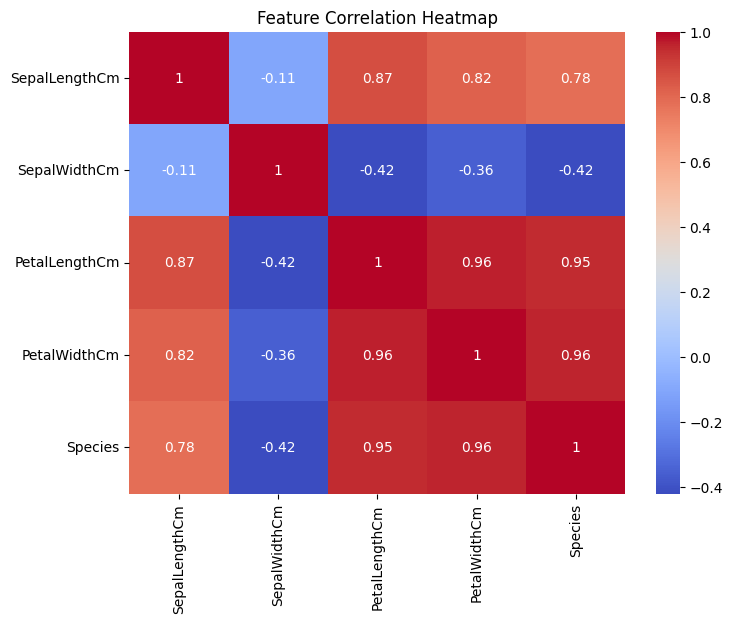

In [11]:
# Check Correlation using the heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

* observation : strong correlation between petalLenghthCm , PetalWidthCm and the Species 

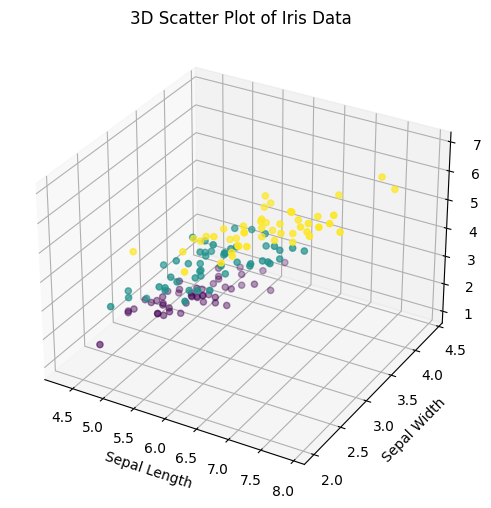

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['SepalLengthCm'], df['SepalWidthCm'],
           df['PetalLengthCm'], c=df['Species'], cmap='viridis')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot of Iris Data')
plt.show()

## Model Preparing and Training

In [13]:
#Deviding the data into Dependent(the target) and Independent variables.
x=df.drop(['Species'],axis=1)
y=df['Species']

In [14]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

* #### we will train four models :
     * Logistic Regression
     * KNN
     * Decision Tree
     * Random Forest 

In [15]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),  
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name}: {acc:.3f}')

Logistic Regression: 0.932
KNN: 0.966
Decision Tree: 0.949
Random Forest: 0.949


## Model Evaluation

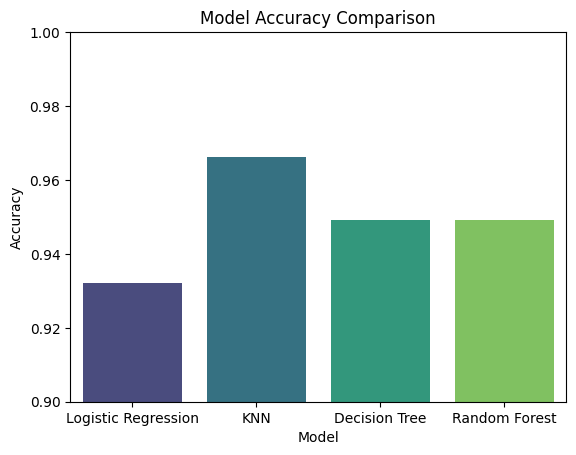

In [16]:
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# convert to DataFrame for plotting
import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)
plt.show()


In [17]:
# create empty list to store results
metrics = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # take weighted avg to get global metrics
    metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-score': report['weighted avg']['f1-score']
    })

# create DataFrame
results_df = pd.DataFrame(metrics)

# sort by Accuracy (best on top)
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# round values for clean display
results_df[['Accuracy','Precision','Recall','F1-score']] = results_df[['Accuracy','Precision','Recall','F1-score']].round(3)

print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-score
0                  KNN     0.966      0.966   0.966     0.966
1        Decision Tree     0.949      0.950   0.949     0.949
2        Random Forest     0.949      0.950   0.949     0.949
3  Logistic Regression     0.932      0.936   0.932     0.932


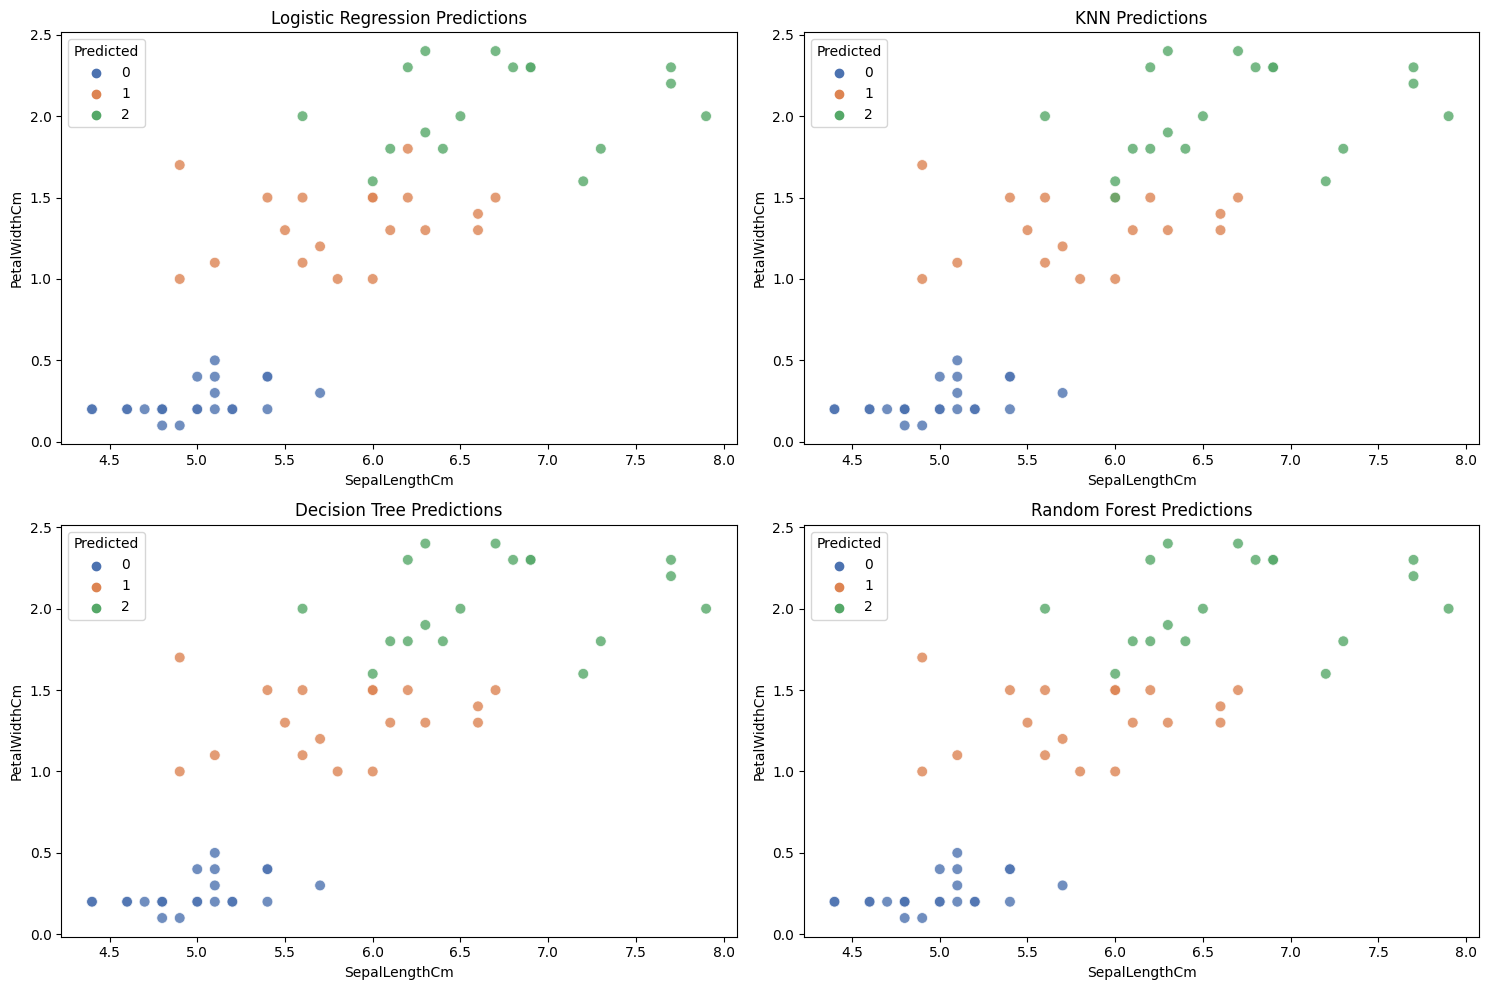

In [18]:
# choose two strong features for visualization
x_col = 'SepalLengthCm'
y_col = 'PetalWidthCm' 

# create subplots for all models
plt.figure(figsize=(15,10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    
    # make predictions
    y_pred = model.predict(X_test)
    
    # combine test data with predictions
    df_plot = pd.DataFrame(X_test, columns=df.columns[:-1])
    df_plot['Actual'] = y_test.values
    df_plot['Predicted'] = y_pred
    
    # scatter plot: model predictions
    sns.scatterplot(
        x=df_plot[x_col], 
        y=df_plot[y_col],
        hue=df_plot['Predicted'],
        palette='deep',
        s=60,
        alpha=0.8
    )
    plt.title(f"{name} Predictions")
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.show()
